## Họ tên: Trương Gia Bình
## Mã sinh viên: 2022600272
## Lớp: KHMT01

In [75]:
# Cài đặt các thư viện cần thiết
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # loại bỏ cảnh báo
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [76]:
# Khai báo các giá trị tham số cố định
PATH_FILE       = 'data_tx2.csv'    # Đường dẫn đến file dữ liệu
K_FOLD          = 3                 # Dùng trong đánh giá kiểm định chéo
DPI             = 200               # Độ phân giải cho biểu đồ

In [77]:
# Câu a: Đọc dữ liệu từ tệp cho trước và chuẩn hóa dữ liệu theo phương pháp MinMax

# Đọc dữ liệu sử dụng pandas
try:
    # Đọc file CSV
    df = pd.read_csv(PATH_FILE,
                     header = 0, 
                     sep = ',',
                     skipinitialspace = True)
    print('Đọc file thành công!')
    #print(df)   # In dữ liệu
except FileNotFoundError:
    print(f"Lỗi: File '{PATH_FILE}' không tồn tại.")
except Exception:
    print(f"Lỗi {Exception}.")

Đọc file thành công!


In [78]:
# Tiền xử lý dữ liệu

# Chuẩn hóa thuộc tính nhãn sang dạng số
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
print(df['Class'])

# Chia dữ liệu
X = df.iloc[:, :-1] # Chứa các thuộc tính của dữ liệu
y = df.iloc[:, -1]  # Chúa nhãn của dữ liệu

# Chuẩn hóa dữ liệu theo phương pháp min-max
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Hiển thị dữ liệu chuẩn hóa
# Chuyển đổi X thành DataFrame 
X_df = pd.DataFrame(X, columns=df.columns[:-1])
print(X_df.to_string())

0     1
1     0
2     1
3     1
4     0
5     1
6     1
7     1
8     0
9     1
10    0
11    1
Name: Class, dtype: int32
           A         B     C         D      E         F         G
0   1.000000  1.000000  0.80  0.062500  0.000  0.372093  0.304348
1   0.191176  0.216418  0.50  0.026786  0.400  0.848837  0.891304
2   0.279412  0.246269  0.00  0.133929  0.325  0.848837  0.152174
3   0.352941  0.141791  0.20  0.000000  0.375  0.965116  1.000000
4   0.500000  0.000000  1.00  0.151786  0.875  0.337209  0.065217
5   0.514706  0.171642  0.25  0.321429  0.275  0.220930  0.217391
6   0.985294  0.067164  0.15  0.116071  0.100  0.790698  0.043478
7   0.102941  0.119403  0.40  0.151786  0.675  0.918605  0.304348
8   0.000000  0.044776  0.90  1.000000  0.250  1.000000  0.065217
9   0.602941  0.186567  0.15  0.883929  0.150  0.000000  0.304348
10  0.014706  0.111940  0.70  0.000000  1.000  0.360465  0.086957
11  0.823529  0.082090  0.65  0.044643  0.975  0.081395  0.000000


In [79]:
# Câu b: Chuẩn bị dữ liệu theo phương pháp kiểm định chéo k-folds

data_fold = {
    'X_train' : [], # Chứa X_train của từng fold
    'y_train' : [],
    'X_test'  : [],
    'y_test'  : []
}  # chứa dữ liệu của từng fold

# Khởi tạo k-fold
kf = KFold(n_splits = K_FOLD)

# Chia dữ liệu theo từng fold
for train_index, test_index in kf.split(X):
    data_fold['X_train'].append(X[train_index])
    data_fold['X_test'].append(X[test_index])
    data_fold['y_train'].append(y[train_index])
    data_fold['y_test'].append(y[test_index])
    

In [80]:
# Câu c: Xây dựng mô hình xác xuất naive-bayes

# Tạo dict chứa các chỉ số đánh giá của mô hình
value_bayes = {
    'accuracy'       : [],
    'recall'         : [],
    'precision'      : [],
    'f1-score'       : [],
    'execution-time' : []
}

for i in range(K_FOLD):
    # Khởi tạo mô hình navie-bayes
    clf_bayes = GaussianNB()

    start_bayes = time.time() # Bắt đầu tính giờ
    
    # Huấn luyện mô hình
    clf_bayes.fit(data_fold['X_train'][i], data_fold['y_train'][i])
    
    # Thời gian huấn luyện
    execution_time_bayes = time.time() - start_bayes
    
    # Dự đoán kết quả
    y_pred_bayes = clf_bayes.predict(data_fold['X_test'][i])

    # Tính các chỉ số đánh giá của mô hình
    acc = accuracy_score(data_fold['y_test'][i], y_pred_bayes)
    rec = recall_score(data_fold['y_test'][i], y_pred_bayes)
    f1  = f1_score(data_fold['y_test'][i], y_pred_bayes)
    pre = precision_score(data_fold['y_test'][i], y_pred_bayes)

    # Lưu kết quả
    value_bayes['accuracy'].append(acc)
    value_bayes['recall'].append(rec)
    value_bayes['precision'].append(pre)
    value_bayes['f1-score'].append(f1)
    value_bayes['execution-time'].append(execution_time_bayes)

    # In kết quả theo từng fold
    print("FOLD:", i + 1)  # In số thứ tự của fold
    # Các chỉ số đánh giá
    print("{:<15}{:<15}{:<15}{:<15}{:<15}".format("Precision", "Recall", "F1-Score", "Accuracy", 'Execution Time'))
    
    # In kết quả
    print("{:<15.4}{:<15.4}{:<15.4}{:<15.4}{:<15.10}".format(
        f"{pre * 100}%", f"{rec * 100}%", f"{f1 * 100}%", f"{acc * 100}%", f"{execution_time_bayes}s"
    ))
    print('-'*75)

# Tính trung bình các chỉ số
acc_bayes = np.mean(value_bayes['accuracy'])
rec_bayes = np.mean(value_bayes['recall'])
pre_bayes = np.mean(value_bayes['precision'])
f1_bayes  = np.mean(value_bayes['f1-score'])
execution_bayes = np.mean(value_bayes['execution-time'])

# Tính độ lệch chuẩn của các chỉ số
std_acc_bayes = np.std(value_bayes['accuracy'])
std_rec_bayes = np.std(value_bayes['recall'])
std_pre_bayes = np.std(value_bayes['precision'])
std_f1_bayes  = np.std(value_bayes['f1-score'])
std_execution_bayes = np.std(value_bayes['execution-time'])

# Hiển thị kết quả
# print("Accuracy:  {:<5.4} ± {:<5.4}".format(acc_bayes, std_acc_bayes))
# print("Recall:    {:<5.4} ± {:<5.4}".format(rec_bayes, std_rec_bayes))
# print("Precision: {:<5.4} ± {:<5.4}".format(pre_bayes, std_pre_bayes))
# print("F1 Score:  {:<5.4} ± {:<5.4}".format(f1_bayes, std_f1_bayes))
# print("Execution Time: {:<5.4} ± {:<5.4}".format(execution_bayes, std_execution_bayes))

FOLD: 1
Precision      Recall         F1-Score       Accuracy       Execution Time 
75.0           100.           85.7           75.0           0.00099897     
---------------------------------------------------------------------------
FOLD: 2
Precision      Recall         F1-Score       Accuracy       Execution Time 
66.6           66.6           66.6           50.0           0.0s           
---------------------------------------------------------------------------
FOLD: 3
Precision      Recall         F1-Score       Accuracy       Execution Time 
50.0           50.0           50.0           50.0           0.00099921     
---------------------------------------------------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


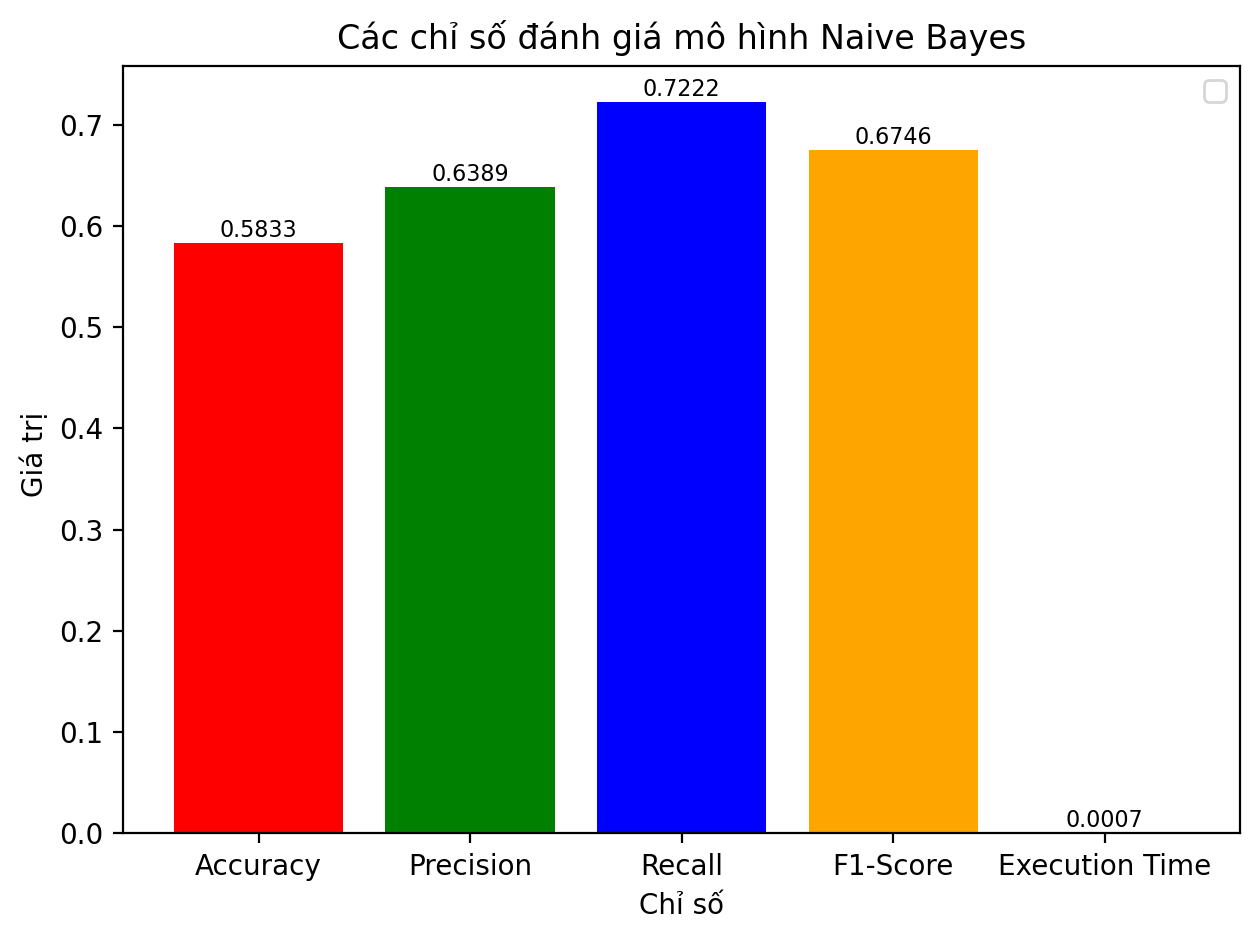

In [81]:
# Vẽ biểu đồ thể hiện các chỉ số
label_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Execution Time']

values = [acc_bayes, pre_bayes, rec_bayes, f1_bayes, execution_bayes]
colors = ['r', 'g', 'b', 'orange', 'black']
fig, ax = plt.subplots(dpi = 200)
rec = ax.bar(label_name, values, color = colors)

# Thêm tiêu đề cho biểu đồ
ax.set_ylabel('Giá trị ')
ax.set_xlabel('Chỉ số')
ax.set_title('Các chỉ số đánh giá mô hình Naive Bayes')
ax.set_xticks(np.arange(len(label_name)))
ax.legend()

for rect in rec:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.001, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

fig.tight_layout()
plt.show()

In [82]:
# Câu d: Xây dựng mô hình SVM

# Tạo dict chứa các chỉ số đánh giá của mô hình
value_svm = {
    'accuracy' : [],
    'recall' : [],
    'precision' : [],
    'f1-score' : [],
    'execution-time' : []
}

for i in range(K_FOLD):
    # Khởi tạo mô hình SVM
    clf_svm = SVC()

    start_svm = time.time() # Bắt đầu tính giờ
    
    # Huấn luyện mô hình
    clf_svm.fit(data_fold['X_train'][i], data_fold['y_train'][i])
    
    # Thời gian huấn luyện
    execution_time_svm = time.time() - start_svm
    
    # Dự đoán kết quả
    y_pred_svm = clf_svm.predict(data_fold['X_test'][i])

    # Tính các chỉ số đánh giá của mô hình
    acc = accuracy_score(data_fold['y_test'][i], y_pred_svm)
    rec = recall_score(data_fold['y_test'][i], y_pred_svm)
    f1  = f1_score(data_fold['y_test'][i], y_pred_svm)
    pre = precision_score(data_fold['y_test'][i], y_pred_svm)

    # Lưu kết quả
    value_svm['accuracy'].append(acc)
    value_svm['recall'].append(rec)
    value_svm['precision'].append(pre)
    value_svm['f1-score'].append(f1)
    value_svm['execution-time'].append(execution_time_svm)

    # In kết quả theo từng fold
    print("FOLD:", i + 1)  # In số thứ tự của fold
    print("{:<15}{:<15}{:<15}{:<15}{:<15}".format("Precision", "Recall", "F1-Score", "Accuracy", 'Execution Time'))
    
    # In kết quả của SVM
    print("{:<15.4}{:<15.4}{:<15.4}{:<15.4}{:<15.10}".format(
        f"{pre * 100}", f"{rec * 100}", f"{f1 * 100}", f"{acc * 100}", f"{execution_time_svm}"
    ))
    print('-'*75)

# Tính trung bình các chỉ số
acc_svm = np.mean(value_svm['accuracy'])
rec_svm = np.mean(value_svm['recall'])
pre_svm = np.mean(value_svm['precision'])
f1_svm  = np.mean(value_svm['f1-score'])
execution_svm = np.mean(value_svm['execution-time'])

# Tính độ lệch chuẩn của các chỉ số
std_acc_svm = np.std(value_svm['accuracy'])
std_rec_svm = np.std(value_svm['recall'])
std_pre_svm = np.std(value_svm['precision'])
std_f1_svm  = np.std(value_svm['f1-score'])
std_execution_svm = np.std(value_svm['execution-time'])

# Hiển thị kết quả
# print("Accuracy:  {:<5.4} ± {:<5.4}".format(acc_svm, std_acc_svm))
# print("Recall:    {:<5.4} ± {:<5.4}".format(rec_svm, std_rec_svm))
# print("Precision: {:<5.4} ± {:<5.4}".format(pre_svm, std_pre_svm))
# print("F1 Score:  {:<5.4} ± {:<5.4}".format(f1_svm, std_f1_svm))
# print("Execution Time: {:<5.4} ± {:<5.4}".format(execution_svm, std_execution_svm))

FOLD: 1
Precision      Recall         F1-Score       Accuracy       Execution Time 
75.0           100.           85.7           75.0           0.00097060     
---------------------------------------------------------------------------
FOLD: 2
Precision      Recall         F1-Score       Accuracy       Execution Time 
75.0           100.           85.7           75.0           0.00097513     
---------------------------------------------------------------------------
FOLD: 3
Precision      Recall         F1-Score       Accuracy       Execution Time 
50.0           100.           66.6           50.0           0.00100111     
---------------------------------------------------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


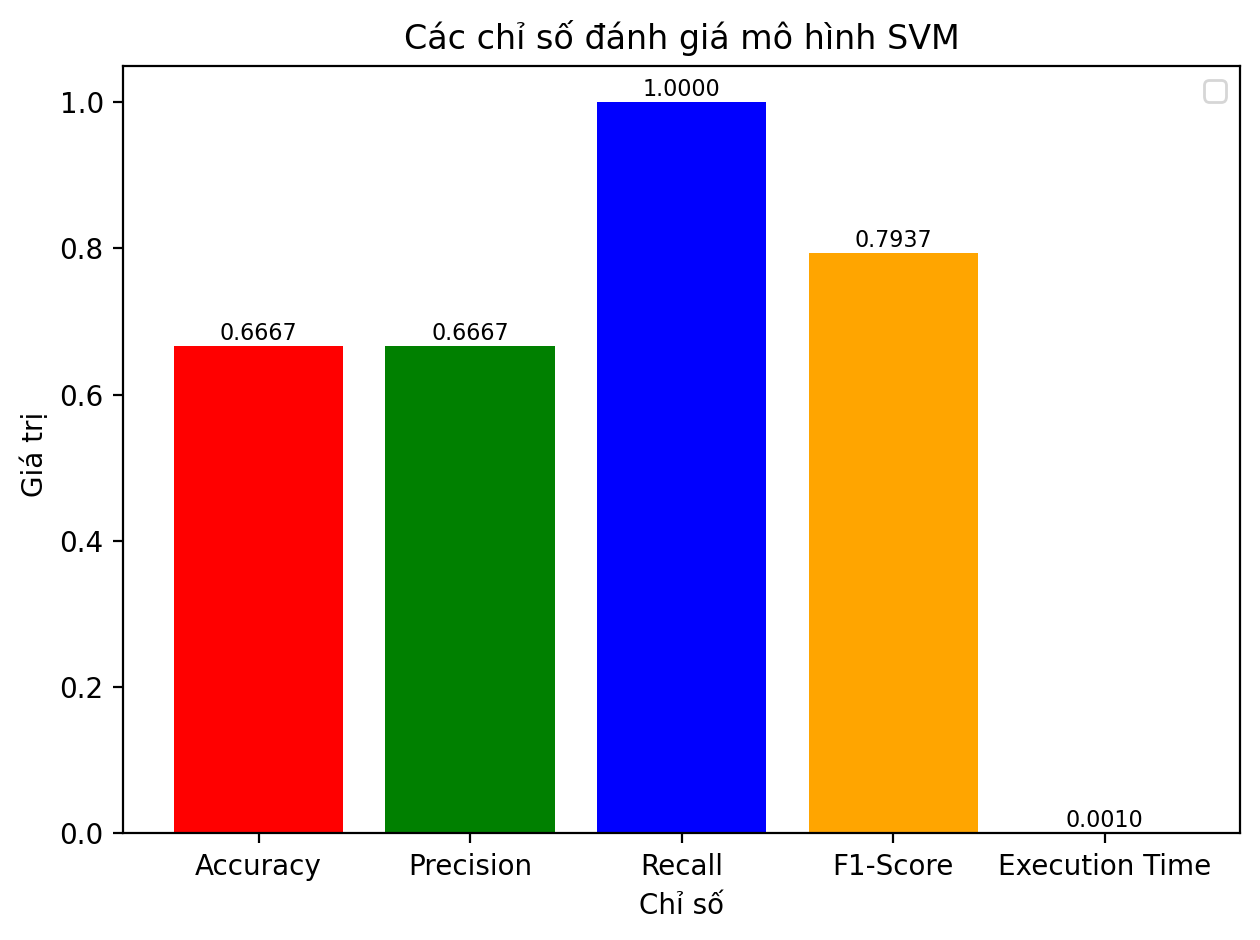

In [83]:
# Vẽ biểu đồ thể hiện các chỉ số
label_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Execution Time']

values = [acc_svm, pre_svm, rec_svm, f1_svm, execution_svm]
colors = ['r', 'g', 'b', 'orange', 'black']
fig, ax = plt.subplots(dpi = 200)
rec = ax.bar(label_name, values, color = colors)

# Thêm tiêu đề cho biểu đồ
ax.set_ylabel('Giá trị ')
ax.set_xlabel('Chỉ số')
ax.set_title('Các chỉ số đánh giá mô hình SVM')
ax.set_xticks(np.arange(len(label_name)))
ax.legend()
for rect in rec:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.001, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

fig.tight_layout()
plt.show()